# Sentiment Analysis Model Evaluation
This notebook evaluates the performance of our sentiment analysis model using the Amazon Review Dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from transformers import pipeline
import torch
import sys
sys.path.append('../')
from functions.main_function import predict_sentiment, get_device

/Users/danielqvu/.pyenv/versions/3.10.16/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load and Prepare Test Data

In [3]:
# Load test data
test_data = pd.read_csv('test.csv', header=None, names=['rating', 'title', 'text'])
# Sample a smaller subset for faster evaluation
test_sample = test_data.sample(n=100)
print(f'Sample size: {len(test_sample)}')

Sample size: 100


/var/folders/8b/6hqn4pk525z062z8jxyjv_vm0000gn/T/ipykernel_63592/218303703.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv('test.csv', header=None, names=['rating', 'title', 'text'])


## Evaluate Model Performance

In [5]:
def map_sentiment_to_rating(sentiment_result):
    # Return neutral (3) if no result
    if not sentiment_result or not isinstance(sentiment_result, list) or not sentiment_result:
        return 3
    
    # Get the prediction dictionary from the list
    prediction = sentiment_result[0]
    if not isinstance(prediction, dict) or 'label' not in prediction:
        return 3
    
    # Direct mapping from sentiment labels to ratings
    sentiment_map = {
        'Very Negative': 1,
        'Negative': 2,
        'Neutral': 3,
        'Positive': 4,
        'Very Positive': 5
    }
    
    # Get the sentiment label and return corresponding rating
    label = prediction['label']
    return sentiment_map.get(label, 3)  # Default to neutral (3) if label not found

# Get predictions
predictions = []
true_pred = []
for text in test_sample['text']:
    result = predict_sentiment(text)
    true_pred.append(result)
    predictions.append(map_sentiment_to_rating(result))

# Convert predictions to numpy array
predictions = np.array(predictions)
true_ratings = test_sample['rating'].values

Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9913870692253113}]
{'negative': 0.9913870692253113}
Using MPS


Device set to use mps


[{'label': 'neutral', 'score': 0.8667239546775818}]
{'neutral': 0.8667239546775818}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9912529587745667}]
{'positive': 0.9912529587745667}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9917846918106079}]
{'negative': 0.9917846918106079}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9997215867042542}]
{'positive': 0.9997215867042542}
Using MPS


Device set to use mps


[{'label': 'neutral', 'score': 0.7262378931045532}]
{'neutral': 0.7262378931045532}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9889822602272034}]
{'positive': 0.9889822602272034}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9920001029968262}]
{'positive': 0.9920001029968262}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.8594900965690613}]
{'negative': 0.8594900965690613}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9942781925201416}]
{'positive': 0.9942781925201416}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9965125918388367}]
{'negative': 0.9965125918388367}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.8262796401977539}]
{'negative': 0.8262796401977539}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9848812818527222}]
{'positive': 0.9848812818527222}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9742587208747864}]
{'positive': 0.9742587208747864}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9569882750511169}]
{'positive': 0.9569882750511169}
Using MPS


Device set to use mps


[{'label': 'neutral', 'score': 0.42882877588272095}]
{'neutral': 0.42882877588272095}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.8034246563911438}]
{'positive': 0.8034246563911438}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.6159156560897827}]
{'negative': 0.6159156560897827}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.7408115863800049}]
{'negative': 0.7408115863800049}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9724940061569214}]
{'negative': 0.9724940061569214}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.999243974685669}]
{'negative': 0.999243974685669}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9998966455459595}]
{'positive': 0.9998966455459595}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9919353723526001}]
{'positive': 0.9919353723526001}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9854323267936707}]
{'positive': 0.9854323267936707}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9995279312133789}]
{'negative': 0.9995279312133789}
Using MPS


Device set to use mps


[{'label': 'neutral', 'score': 0.7823740243911743}]
{'neutral': 0.7823740243911743}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9310244917869568}]
{'negative': 0.9310244917869568}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.8413367867469788}]
{'negative': 0.8413367867469788}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9994981288909912}]
{'negative': 0.9994981288909912}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.8672184944152832}]
{'positive': 0.8672184944152832}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9990948438644409}]
{'negative': 0.9990948438644409}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9967753291130066}]
{'positive': 0.9967753291130066}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.8691574335098267}]
{'negative': 0.8691574335098267}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.5588075518608093}]
{'negative': 0.5588075518608093}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9989104270935059}]
{'negative': 0.9989104270935059}
Using MPS


Device set to use mps


[{'label': 'neutral', 'score': 0.7739265561103821}]
{'neutral': 0.7739265561103821}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.7725439071655273}]
{'negative': 0.7725439071655273}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9998712539672852}]
{'negative': 0.9998712539672852}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9399923086166382}]
{'negative': 0.9399923086166382}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.4112909436225891}]
{'positive': 0.4112909436225891}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.5651878714561462}]
{'positive': 0.5651878714561462}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9980652928352356}]
{'negative': 0.9980652928352356}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.8160269260406494}]
{'positive': 0.8160269260406494}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9931114912033081}]
{'positive': 0.9931114912033081}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9852691292762756}]
{'negative': 0.9852691292762756}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9474624395370483}]
{'positive': 0.9474624395370483}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9933913946151733}]
{'negative': 0.9933913946151733}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9944981932640076}]
{'negative': 0.9944981932640076}
Using MPS


Device set to use mps


[{'label': 'neutral', 'score': 0.7295988202095032}]
{'neutral': 0.7295988202095032}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.6527218818664551}]
{'negative': 0.6527218818664551}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9988051652908325}]
{'negative': 0.9988051652908325}
Using MPS


Device set to use mps


[{'label': 'neutral', 'score': 0.587773323059082}]
{'neutral': 0.587773323059082}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.49907469749450684}]
{'negative': 0.49907469749450684}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.777117133140564}]
{'negative': 0.777117133140564}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.962800920009613}]
{'negative': 0.962800920009613}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9994175434112549}]
{'positive': 0.9994175434112549}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9893280863761902}]
{'positive': 0.9893280863761902}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9935091137886047}]
{'negative': 0.9935091137886047}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9996509552001953}]
{'negative': 0.9996509552001953}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9589419960975647}]
{'positive': 0.9589419960975647}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9615391492843628}]
{'negative': 0.9615391492843628}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.969234824180603}]
{'positive': 0.969234824180603}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.8805588483810425}]
{'positive': 0.8805588483810425}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9989206790924072}]
{'positive': 0.9989206790924072}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9260600805282593}]
{'negative': 0.9260600805282593}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9101777672767639}]
{'negative': 0.9101777672767639}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9992225170135498}]
{'positive': 0.9992225170135498}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9930070638656616}]
{'negative': 0.9930070638656616}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9831956028938293}]
{'negative': 0.9831956028938293}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9605950713157654}]
{'positive': 0.9605950713157654}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9615801572799683}]
{'positive': 0.9615801572799683}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.6081749796867371}]
{'negative': 0.6081749796867371}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.47565382719039917}]
{'positive': 0.47565382719039917}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9979211688041687}]
{'negative': 0.9979211688041687}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9977813363075256}]
{'positive': 0.9977813363075256}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9151041507720947}]
{'negative': 0.9151041507720947}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9031733274459839}]
{'positive': 0.9031733274459839}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9989950060844421}]
{'positive': 0.9989950060844421}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.5491438508033752}]
{'negative': 0.5491438508033752}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.991392970085144}]
{'negative': 0.991392970085144}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9999750852584839}]
{'negative': 0.9999750852584839}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9827515482902527}]
{'positive': 0.9827515482902527}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9925689101219177}]
{'negative': 0.9925689101219177}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9955716133117676}]
{'negative': 0.9955716133117676}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9900988936424255}]
{'negative': 0.9900988936424255}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9963082671165466}]
{'positive': 0.9963082671165466}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9894557595252991}]
{'positive': 0.9894557595252991}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9847234487533569}]
{'positive': 0.9847234487533569}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.7277142405509949}]
{'negative': 0.7277142405509949}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9966781139373779}]
{'negative': 0.9966781139373779}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9829487204551697}]
{'negative': 0.9829487204551697}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9894827604293823}]
{'positive': 0.9894827604293823}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9711227416992188}]
{'negative': 0.9711227416992188}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9467531442642212}]
{'positive': 0.9467531442642212}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9935494065284729}]
{'positive': 0.9935494065284729}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.9877265095710754}]
{'negative': 0.9877265095710754}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.9956448078155518}]
{'positive': 0.9956448078155518}
Using MPS


Device set to use mps


[{'label': 'negative', 'score': 0.6650133728981018}]
{'negative': 0.6650133728981018}
Using MPS


Device set to use mps


[{'label': 'positive', 'score': 0.998870313167572}]
{'positive': 0.998870313167572}
Using MPS


Device set to use mps


[{'label': 'neutral', 'score': 0.4855930209159851}]
{'neutral': 0.4855930209159851}


## Visualization and Analysis

In [6]:
# Convert true_pred to numerical ratings (2-4)
pred = []
print(true_pred)
for item in true_pred:
    sentiment = list(item.keys())[0]
    if sentiment in ['Very Negative', 'negative']:
        pred.append(2)
    elif sentiment == 'neutral':
        pred.append(3)
    elif sentiment in ['Very Positive', 'positive']:
        pred.append(4)

# Convert true_ratings to integer array and map 1-5 to 2-4
true_ratings = np.array(true_ratings).astype(int)
# Map 1 to 2 and 5 to 4å√
true_ratings = np.where(true_ratings == 1, 2, true_ratings)
true_ratings = np.where(true_ratings == 5, 4, true_ratings)

print("Predicted ratings:", pred)
print("True ratings:", true_ratings)
print(true_ratings[0])

[{'negative': 0.9913870692253113}, {'neutral': 0.8667239546775818}, {'positive': 0.9912529587745667}, {'negative': 0.9917846918106079}, {'positive': 0.9997215867042542}, {'neutral': 0.7262378931045532}, {'positive': 0.9889822602272034}, {'positive': 0.9920001029968262}, {'negative': 0.8594900965690613}, {'positive': 0.9942781925201416}, {'negative': 0.9965125918388367}, {'negative': 0.8262796401977539}, {'positive': 0.9848812818527222}, {'positive': 0.9742587208747864}, {'positive': 0.9569882750511169}, {'neutral': 0.42882877588272095}, {'positive': 0.8034246563911438}, {'negative': 0.6159156560897827}, {'negative': 0.7408115863800049}, {'negative': 0.9724940061569214}, {'negative': 0.999243974685669}, {'positive': 0.9998966455459595}, {'positive': 0.9919353723526001}, {'positive': 0.9854323267936707}, {'negative': 0.9995279312133789}, {'neutral': 0.7823740243911743}, {'negative': 0.9310244917869568}, {'negative': 0.8413367867469788}, {'negative': 0.9994981288909912}, {'positive': 0.86

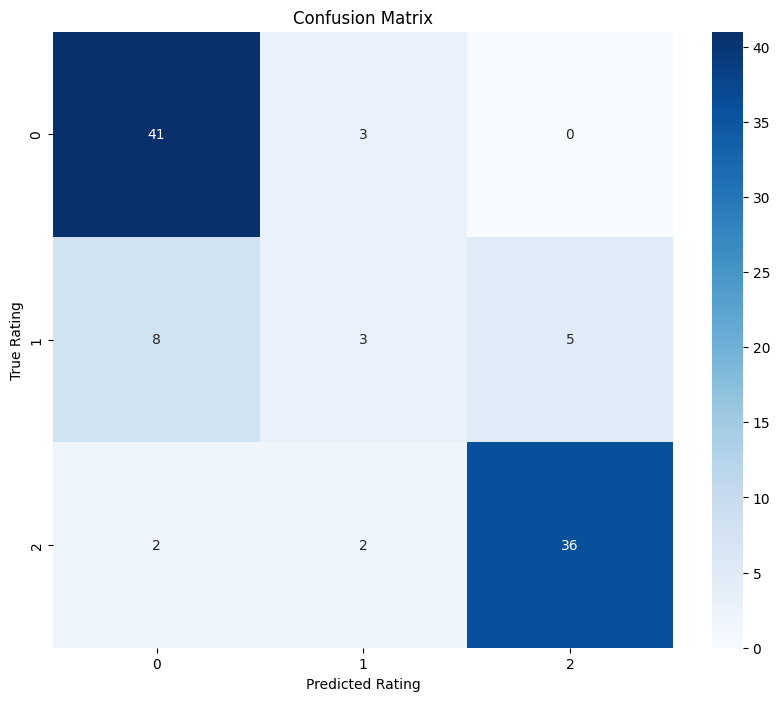

Classification Report:
              precision    recall  f1-score   support

           2       0.80      0.93      0.86        44
           3       0.38      0.19      0.25        16
           4       0.88      0.90      0.89        40

    accuracy                           0.80       100
   macro avg       0.69      0.67      0.67       100
weighted avg       0.76      0.80      0.78       100



In [7]:
# Create confusion matrix
cm = confusion_matrix(true_ratings, pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Rating')
plt.ylabel('True Rating')
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(true_ratings, pred))

## Error Analysis

2 4
2 4


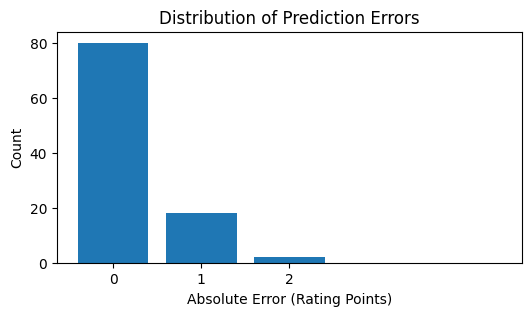

Mean Absolute Error: 0.22
Median Absolute Error: 0.00


In [11]:
# Calculate error distribution
errors = np.abs(true_ratings - pred)
print(min(true_ratings), max(true_ratings))
print(min(pred), max(pred))
plt.figure(figsize=(6, 3))
plt.hist(errors, bins=range(6), align='left', rwidth=0.8)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Absolute Error (Rating Points)')
plt.ylabel('Count')
plt.xticks(range(3))
plt.show()

print(f'Mean Absolute Error: {np.mean(errors):.2f}')
print(f'Median Absolute Error: {np.median(errors):.2f}')

## Sample Error Cases

In [13]:
# Find cases with largest prediction errors
test_sample['predicted_rating'] = pred
test_sample['error'] = errors

print('Top 5 cases with largest prediction errors:')
error_cases = test_sample.nlargest(5, 'error')
for _, case in error_cases.iterrows():
    print(f'True Rating: {case["rating"]}')
    print(f'Predicted Rating: {case["predicted_rating"]}')
    print(f'Text: {case["text"]}')

Top 5 cases with largest prediction errors:
True Rating: 4
Predicted Rating: 2
Text: This movie assists young boys in imaginative dance techniques. The instuctor does not use technical names for any of the movements but tells them basically to dance and move in story form. It is great for learning the movement but would need real instruction to learn correct names etc.... After each child student segment there is and older dancer showing the correct way to do it.
True Rating: 5
Predicted Rating: 2
Text: NHT only honors the 5 year warranty on these speakers if purchased through an authorized dealer. Amazon.com is NOT authorized. The only .com authorized to sell these with a warranty is Crutchfield.comJust a warning to all of you out there.
True Rating: 2
Predicted Rating: 3
Text: A very well made product and great for the minimalist type of folks.Wife like the looks of the leather but I view this tote did not provide me the return on investment when compared to alternatives. an item tha